# Importing and manipulating data with Pandas
An initial analysis of AirBnB listings in Brussels.

In [41]:
# this cell contains our library imports
import pandas as pd

In [42]:
data = pd.read_csv('listings_brussels_20190813.csv')

In [43]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,Molenbeek-Saint-Jean,50.85787,4.30809,Entire home/apt,93,2,15,2018-12-31,0.23,229
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,Molenbeek-Saint-Jean,50.85697,4.30651,Entire home/apt,78,2,2,2018-10-28,0.05,340
2,42521,Ixelles: spacious bedroom+boudoir+ensuite bath...,185699,Claire,Ixelles,50.81929,4.38790,Private room,45,2,130,2019-07-28,1.19,283
3,45145,B&B Welcome to my place - 2,199370,Erick,Saint-Josse-ten-Noode,50.85300,4.36971,Private room,70,2,3,2019-04-08,0.03,190
4,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,Woluwe-Saint-Pierre,50.83821,4.40683,Entire home/apt,200,2,0,NaN,NaN,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,37706551,Cozy apartment with big terrace,96121923,Jenny,Forest,50.81366,4.32155,Entire home/apt,100,3,0,NaN,NaN,59
8924,37706974,Appartement 2 chambres à Forest gare du midi,24444714,Cedric,Forest,50.81784,4.32686,Entire home/apt,84,3,0,NaN,NaN,362
8925,37707368,Bright Duplex close to EU Institutions,18722558,Fernando,Saint-Josse-ten-Noode,50.84860,4.37296,Entire home/apt,49,4,0,NaN,NaN,18
8926,37710276,Nice room in a beautiful appartement BRU CENTER,234800974,Hicham,Bruxelles,50.85365,4.35426,Private room,45,2,0,NaN,NaN,74


## Aggregation for an entire table

In [44]:
data['price'].agg('mean')

73.11312724014337

In [45]:
data['price'].agg(['min', 'max', 'mean', 'count'])

min         0.000000
max      8944.000000
mean       73.113127
count    8928.000000
Name: price, dtype: float64

In [46]:
data.query('neighbourhood == "Uccle"')['price'].agg(['min', 'max', 'mean', 'count'])

min       11.000000
max      400.000000
mean      71.100719
count    417.000000
Name: price, dtype: float64

## Group by + aggregate

In [47]:
data.groupby('neighbourhood')['price'].agg(['min', 'max', 'mean', 'count'])

,min,max,mean,count
neighbourhood,,,,
Anderlecht,13,8944,98.631034,290
Auderghem,15,200,62.372881,118
Berchem-Sainte-Agathe,18,250,65.208333,24
Bruxelles,0,7000,87.397813,2652
Etterbeek,9,1500,69.374765,531
Evere,12,150,46.804124,97
Forest,15,600,60.291667,480
Ganshoren,18,150,61.305556,36
Ixelles,12,995,67.476766,1571


In [48]:
data.groupby('host_id')['price'].agg(['min', 'max', 'mean', 'count']).sort_values('count', ascending=False)

,min,max,mean,count
host_id,,,,
23082521,15,59,25.047619,84
19293722,30,200,81.049383,81
2792958,57,159,94.188406,69
19427428,80,400,136.231884,69
5056483,53,319,157.377049,61
...,...,...,...,...
24696552,30,30,30.000000,1
24673632,75,75,75.000000,1
24666523,95,95,95.000000,1


In [49]:
data.groupby('host_id')['price'].agg(['min', 'max', 'mean', 'count']).sort_values('count', ascending=False).query('count > 2')

,min,max,mean,count
host_id,,,,
23082521,15,59,25.047619,84
19293722,30,200,81.049383,81
2792958,57,159,94.188406,69
19427428,80,400,136.231884,69
5056483,53,319,157.377049,61
...,...,...,...,...
206713553,32,55,45.666667,3
280647735,149,300,204.333333,3
5654316,38,55,47.333333,3


In [50]:
data.groupby('host_id')['price'].agg(['min', 'max', 'mean', 'count']).query('count > 2').sort_values('mean', ascending=False)

,min,max,mean,count
host_id,,,,
231072147,1460,1460,1460.000000,4
45185586,600,800,733.333333,3
12534520,320,410,376.666667,3
26283277,105,1000,348.750000,4
3662851,15,900,318.666667,6
...,...,...,...,...
86672973,16,46,21.500000,8
13234621,18,25,21.400000,5
59129325,20,22,21.333333,3


## Creating new columns

In [51]:
data['occupancy_rate'] = data['reviews_per_month'] / 0.5 * data['minimum_nights'] / 31

In [52]:
def calculate_occupancy_rate(number_of_reviews, minimum_nights):
    # first we set some additional assumptions
    review_rate = 0.5
    days_in_month = 31
    average_stay_length_assumption = 3
    max_occupancy = 0.7

    # calculate occupancy
    average_stay_length = minimum_nights.clip(lower = average_stay_length_assumption)
    occupancy_per_month = number_of_reviews / review_rate * average_stay_length / days_in_month
    
    # cap occupancy at max_occupancy
    exceed_max_occupancy = occupancy_per_month > max_occupancy
    
    occupancy_per_month.loc[exceed_max_occupancy] = 0.7

    # fill missing values with a zero (0)
    occupancy_per_month_fillna = occupancy_per_month.fillna(0)

    return occupancy_per_month_fillna

In [53]:
data['occupancy_rate'] = calculate_occupancy_rate(data['reviews_per_month'], data['minimum_nights'])

array([[<AxesSubplot:title={'center':'occupancy_rate'}>]], dtype=object)

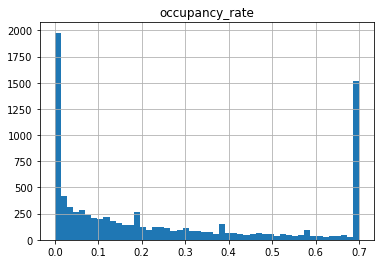

In [54]:
data.hist(column = 'occupancy_rate', bins = 50)

## Average monthly rental income

In [55]:
data['monthly_rental_income'] =  data['price'] * data['occupancy_rate'] * 31

In [56]:
data['monthly_rental_income'].agg(['mean', 'max', 'min'])

mean       570.972417
max     160992.000000
min          0.000000
Name: monthly_rental_income, dtype: float64

In [57]:
data.query('price < 600').groupby('host_id')['monthly_rental_income'].agg(['sum']).agg(['mean'])

,sum
mean,748.205992


In [58]:
data.query('price < 600').groupby('host_id')['monthly_rental_income'].agg(['mean', 'max', 'min', 'std', 'sum']).sort_values('sum', ascending=False).head(10)

,mean,max,min,std,sum
host_id,,,,,
5056483,1667.575410,6922.30,0.0,1978.074692,101722.10
19293722,1031.829630,3906.00,0.0,703.819863,83578.20
19427428,653.056522,2457.00,0.0,549.259701,45060.90
2792958,553.689275,3016.30,0.0,550.026268,38204.56
38724195,1847.605882,4340.00,703.8,950.349796,31409.30
871030,700.255909,2333.34,67.2,545.975239,30811.26
42832143,1446.305000,2365.30,1063.3,390.173063,28926.10
231476878,1846.966667,2853.00,592.5,722.369100,27704.50
21479909,1480.747778,4272.00,0.0,1181.123298,26653.46


In [59]:
data.query('price < 600').groupby('host_id')['monthly_rental_income'].agg(['mean', 'max', 'min', 'std', 'sum']).sort_values('sum', ascending=False).head(10)['sum'].agg(['sum'])

sum    437267.68
Name: sum, dtype: float64

In [60]:
data.query('price < 600').groupby('host_id')['monthly_rental_income'].agg(['mean', 'max', 'min', 'std', 'sum']).query('sum == 0')

,mean,max,min,std,sum
host_id,,,,,
68522,0.0,0.0,0.0,NaN,0.0
102116,0.0,0.0,0.0,NaN,0.0
219560,0.0,0.0,0.0,NaN,0.0
277574,0.0,0.0,0.0,NaN,0.0
293214,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...
284670452,0.0,0.0,0.0,NaN,0.0
284679788,0.0,0.0,0.0,0.0,0.0
284724713,0.0,0.0,0.0,0.0,0.0


In [61]:
data.query('occupancy_rate >= 0.25')

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,occupancy_rate,monthly_rental_income
5,52796,Bright apartment in Ixelles/Louise,244722,Pierre,Ixelles,50.83356,4.36027,Entire home/apt,74,5,96,2019-07-20,0.93,326,0.300000,688.2
20,134357,"Gare du Midi - Appart. ""Florence""",433586,Kristella/Francesco,Anderlecht,50.84039,4.33664,Entire home/apt,70,1,230,2019-07-06,9.57,0,0.700000,1519.0
29,159836,"Duplex, typisch Brussels herenhuis.",766382,Lucile,Schaerbeek,50.87374,4.38130,Entire home/apt,39,2,113,2019-07-24,2.40,147,0.464516,561.6
32,196623,LOFT JAMAR BRUXELLES GARE DU MIDI,957771,Sylvain,Saint-Gilles,50.83896,4.33735,Entire home/apt,75,1,154,2019-08-03,1.62,280,0.313548,729.0
33,198943,"Design studio with garden, Brussels",971770,Antoine,Bruxelles,50.82538,4.36706,Entire home/apt,80,3,156,2019-07-22,1.64,135,0.317419,787.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8782,37357264,Casa Caramel,13801441,Carmina,Ganshoren,50.86941,4.31674,Private room,27,2,2,2019-08-08,2.00,89,0.387097,324.0
8790,37379283,Chambre 1' dans très grand loft commun (rooftop),217580093,Steve,Molenbeek-Saint-Jean,50.85631,4.31839,Entire home/apt,45,2,2,2019-08-10,2.00,338,0.387097,540.0
8796,37384664,Charming cosy room close by city center,68153356,Margot Et Moustafa,Anderlecht,50.83737,4.30910,Private room,30,1,2,2019-08-07,2.00,168,0.387097,360.0
8810,37423123,Spacious Flat in the Top Area of the Center :),213313214,Jeanne,Bruxelles,50.85593,4.34753,Private room,45,2,3,2019-08-09,3.00,11,0.580645,810.0


In [62]:
data.groupby('neighbourhood')['monthly_rental_income'].agg(['mean']).sort_values('mean', ascending=False)

,mean
neighbourhood,
Anderlecht,1076.396345
Bruxelles,829.351916
Berchem-Sainte-Agathe,688.771667
Jette,650.670727
Koekelberg,568.954444
Ganshoren,512.648889
Molenbeek-Saint-Jean,498.070860
Saint-Josse-ten-Noode,486.475868
Saint-Gilles,459.102229


In [63]:
data.query('occupancy_rate > 0.25').groupby('neighbourhood')['occupancy_rate'].agg(['count']).sort_values('count', ascending=False)

,count
neighbourhood,
Bruxelles,1319
Ixelles,544
Saint-Gilles,335
Schaerbeek,236
Etterbeek,148
Forest,137
Uccle,134
Anderlecht,122
Saint-Josse-ten-Noode,102


## Plotting with for loops

In [64]:
neighbourhoods = ['Molenbeek-Saint-Jean', 'Bruxelles', 'Uccle', 'Forest', 'Saint-Josse-ten-Noode', 'Schaerbeek']

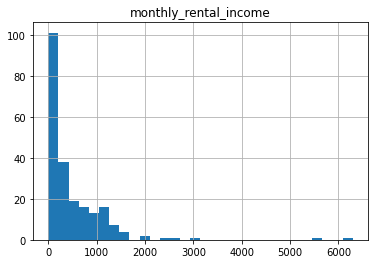

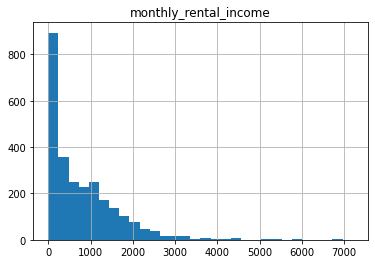

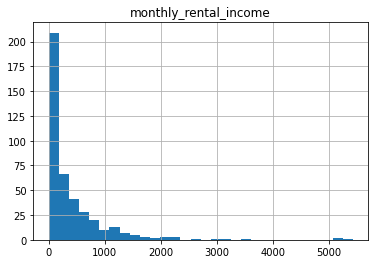

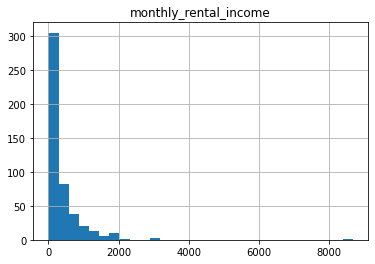

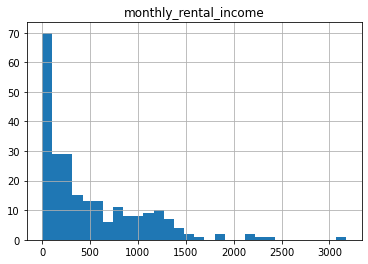

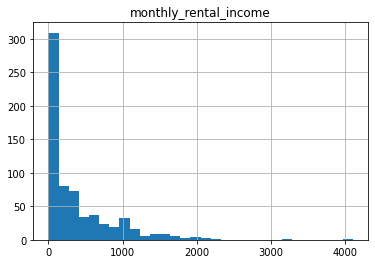

In [65]:
for value in neighbourhoods:
   data.query('price < 600').query('neighbourhood == @value').hist(column = 'monthly_rental_income', bins = 30)
